In [1]:
import glob
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from mpl_toolkits.axes_grid1 import ImageGrid

### Validate Data Path

In [2]:
cwd = os.getcwd()

## Place the data in Food-11 directory
data_in_dir = os.path.join(cwd, "Food-11")
assert(os.path.isdir(data_in_dir))

subdirs = {
    'train' : 'training',
    'valid' : 'validation',
    'eval'  : 'evaluation'}
dirs = os.listdir(data_in_dir)

## Validate we have these 3 subdirectories
assert(len(dirs) == len(subdirs) and sorted(dirs) == sorted(subdirs.values()))

## Create output directory in current path to store images
image_dir = os.path.join(cwd, "food-classification-eda-images")
if not os.path.exists(image_dir): os.makedirs(image_dir)

### Read the images from directory

In [3]:
## training, validation and evluation data directories
training_data_dir = os.path.join(data_in_dir, subdirs['train'])
validation_data_dir = os.path.join(data_in_dir, subdirs['valid'])
evaluation_data_dir = os.path.join(data_in_dir, subdirs['eval'])

## training, validation and evluation data images
training_images = glob.glob(os.path.join(training_data_dir, "*"))
validation_images = glob.glob(os.path.join(validation_data_dir, "*"))
evaluation_images = glob.glob(os.path.join(evaluation_data_dir, "*"))

all_images = [training_images, validation_images, evaluation_images]
all_directories = [training_data_dir, validation_data_dir, evaluation_data_dir]

In [4]:
# Create dictionary of target classes
label_dict = {
 0: 'Bread',
 1: 'Dairy product',
 2: 'Dessert',
 3: 'Egg',
 4: 'Fried food',
 5: 'Meat',
 6: 'Noodles/Pasta',
 7: 'Rice',
 8: 'Seafood',
 9: 'Soup',
 10: 'Vegetable/Fruit',
}

## Prepare Training Dataframe

In [5]:
training = pd.DataFrame(training_images)
training.columns = ['Path']
training['Label'] = training.Path.apply(lambda x: os.path.basename(x).split('_')[0])
training.describe()

,Path,Label
count,9866,9866
unique,9866,11
top,C:\Users\hemasb\Desktop\workspace\Food-11\trai...,2
freq,1,1500


### Validate a single training image

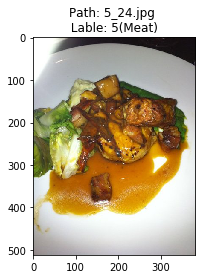

In [6]:
fig, ax = plt.subplots()
ix = np.random.randint(0, len(training)) # randomly select a index
img_path = training.Path[ix]
plt.imshow(io.imread(img_path), cmap='binary')
cat = training.Label[ix] # get the radiograph category
plt.title('Path: %s \n Lable: %s(%s) ' %(os.path.basename(img_path), cat, label_dict[int(cat)]))
plt.show()
fig.savefig(os.path.join(image_dir, 'one_sample_image_test.jpg'), bbox_inches='tight', pad_inches=0)

In [7]:
'''
Helper function to visualize multiple images in single line. 
'''
def validate_data(data_in, display_text):
    fig = plt.figure(1, figsize=(16, 4))
    plt.title('Visually Validate Image and Label')
    plt.axis('off')
    grid = ImageGrid(fig, 111, nrows_ncols=(1, 5), axes_pad=0.05)  
    left, width = .25, .5
    bottom, height = .25, .5
    right = left + width
    top = bottom + height
    img_idx=0
    for (i, row) in data_in.sample(5).iterrows():
        ax = grid[img_idx]
        ax.text(0.5*(left+right), 0.5*(bottom+top), 
                label_dict[int(row.Label)],ha='center',va='center',
                fontsize=20, color='red',transform=ax.transAxes)
        ax.grid(False)
        img = io.imread(row.Path)
        ax.imshow(img)
        img_idx+=1
        print(row.Path, label_dict[int(row.Label)])

    plt.show()
    fig.savefig(os.path.join(image_dir, 'Test_'+display_text+'_Image.jpg'), bbox_inches='tight', pad_inches=0)

### Visually validate training images and label

C:\Users\hemasb\Desktop\workspace\Food-11\training\0_358.jpg Bread
C:\Users\hemasb\Desktop\workspace\Food-11\training\8_244.jpg Seafood
C:\Users\hemasb\Desktop\workspace\Food-11\training\0_394.jpg Bread
C:\Users\hemasb\Desktop\workspace\Food-11\training\0_885.jpg Bread
C:\Users\hemasb\Desktop\workspace\Food-11\training\6_274.jpg Noodles/Pasta


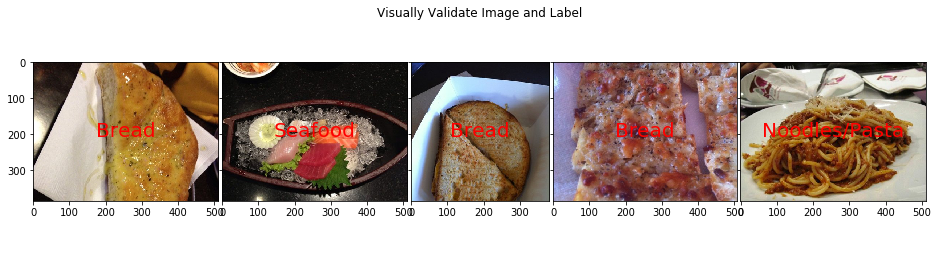

In [8]:
validate_data(training, "Training")

## Prepare Validation Dataframe

In [9]:
validation = pd.DataFrame(validation_images)

validation.columns = ['Path']
validation['Label'] = validation.Path.apply(lambda x: os.path.basename(x).split('_')[0])
validation.describe()

,Path,Label
count,3430,3430
unique,3430,11
top,C:\Users\hemasb\Desktop\workspace\Food-11\vali...,2
freq,1,500


### Visually validate valuation images and label

C:\Users\hemasb\Desktop\workspace\Food-11\validation\10_155.jpg Vegetable/Fruit
C:\Users\hemasb\Desktop\workspace\Food-11\validation\2_263.jpg Dessert
C:\Users\hemasb\Desktop\workspace\Food-11\validation\4_124.jpg Fried food
C:\Users\hemasb\Desktop\workspace\Food-11\validation\4_30.jpg Fried food
C:\Users\hemasb\Desktop\workspace\Food-11\validation\9_220.jpg Soup


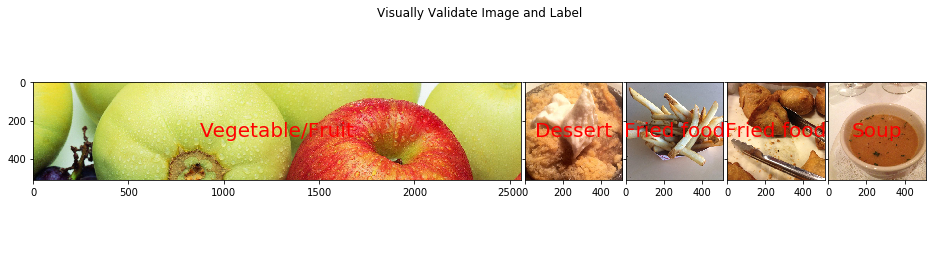

In [10]:
validate_data(validation, "Validation")

## Prepare Evaluation Dataframe

In [11]:
evaluation = pd.DataFrame(evaluation_images)

evaluation.columns = ['Path']
evaluation['Label'] = evaluation.Path.apply(lambda x: os.path.basename(x).split('_')[0])
evaluation.describe()

,Path,Label
count,3347,3347
unique,3347,11
top,C:\Users\hemasb\Desktop\workspace\Food-11\eval...,2
freq,1,500


### Visually validate evaluation images and label

C:\Users\hemasb\Desktop\workspace\Food-11\evaluation\3_48.jpg Egg
C:\Users\hemasb\Desktop\workspace\Food-11\evaluation\4_132.jpg Fried food
C:\Users\hemasb\Desktop\workspace\Food-11\evaluation\6_132.jpg Noodles/Pasta
C:\Users\hemasb\Desktop\workspace\Food-11\evaluation\9_133.jpg Soup
C:\Users\hemasb\Desktop\workspace\Food-11\evaluation\2_200.jpg Dessert


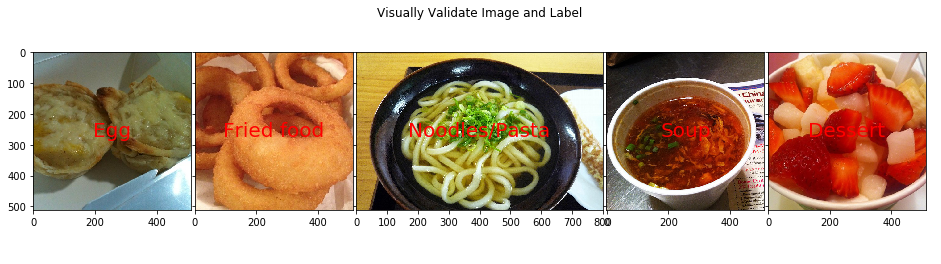

In [12]:
validate_data(evaluation, "Evaluation")

In [13]:
training.Label = training.Label.astype(int)
validation.Label = validation.Label.astype(int)
evaluation.Label = evaluation.Label.astype(int)

## Compare the dataset distribution

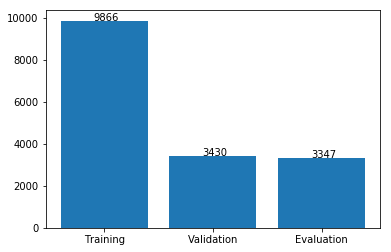

In [14]:
fig, ax = plt.subplots()
labels = ['Training', 'Validation', 'Evaluation']
sizes = [training.shape[0], validation.shape[0], evaluation.shape[0]]

plt.bar(range(len(labels)), sizes, align='center')
plt.xticks(range(len(labels)), labels)
for i, v in enumerate(sizes):
    # ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
    ax.text(i-0.1, v+3, str(v))
plt.show()
fig.savefig(os.path.join(image_dir, 'Data_Split.jpg'), bbox_inches='tight', pad_inches=0)

## Compare the dataset distribution ratios

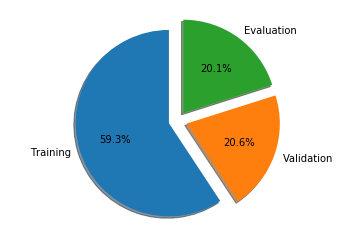

In [15]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:

explode = (0.1, 0.1, 0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()
fig.savefig(os.path.join(image_dir, 'Data_Split_Ratio.jpg'), bbox_inches='tight', pad_inches=0)

## Compare Training vs Validation AND Training vs Evaluation

In [16]:
print("Training to validation ratio is {0:.0%}".format(validation.shape[0]/training.shape[0]))
print("Training to testing ratio is {0:.0%}".format(evaluation.shape[0]/training.shape[0]))
print("Validation to testing ratio is {0:.0%}".format(evaluation.shape[0]/validation.shape[0]))

Training to validation ratio is 35%
Training to testing ratio is 34%
Validation to testing ratio is 98%


## Compare the dataset distribution over different labels

In [17]:
train_index, train_counts = np.unique(training.Label.values,return_counts=True)
valid_index, valid_counts = np.unique(validation.Label.values,return_counts=True)
eval_index, eval_counts = np.unique(evaluation.Label.values,return_counts=True)
print(train_index, train_counts)
print(valid_index, valid_counts)
print(eval_index, eval_counts)

[ 0  1  2  3  4  5  6  7  8  9 10] [ 994  429 1500  986  848 1325  440  280  855 1500  709]
[ 0  1  2  3  4  5  6  7  8  9 10] [362 144 500 327 326 449 147  96 347 500 232]
[ 0  1  2  3  4  5  6  7  8  9 10] [368 148 500 335 287 432 147  96 303 500 231]


## Visualize data distribution per Label

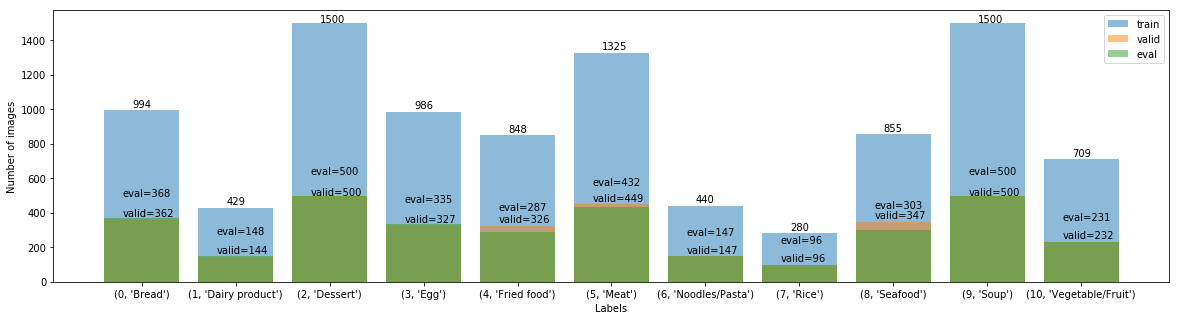

In [18]:
fig, ax = plt.subplots(figsize=(20, 5))
x_pos = np.arange(len(label_dict))
plt.bar(x_pos, train_counts, alpha=0.5)
plt.bar(x_pos, valid_counts, alpha=0.5)
plt.bar(x_pos, eval_counts, alpha=0.5)
m = max(train_counts)
for i, v in enumerate(train_counts):
    # ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
    if v==m: ax.text(i-0.1, v+3, str(v))
    else: ax.text(i-0.1, v + 20, str(v))

m = max(valid_counts)
for i, v in enumerate(valid_counts):
    # ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
    if v==m: ax.text(i-0.2, v+3, "valid="+str(v))
    else: ax.text(i-0.2, v + 20, "valid="+str(v))
        
m = max(eval_counts)
for i, v in enumerate(eval_counts):
    # ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
    ax.text(i-0.2, v+125, "eval="+str(v))

plt.xticks(x_pos, label_dict.items())
plt.xlabel('Labels' )
plt.ylabel('Number of images')
plt.legend(['train', 'valid', 'eval'])
plt.show()
fig.savefig(os.path.join(image_dir, 'Data_Split_Per_Label.jpg'), bbox_inches='tight', pad_inches=0)

## Visualize data distribution per Label Ratio

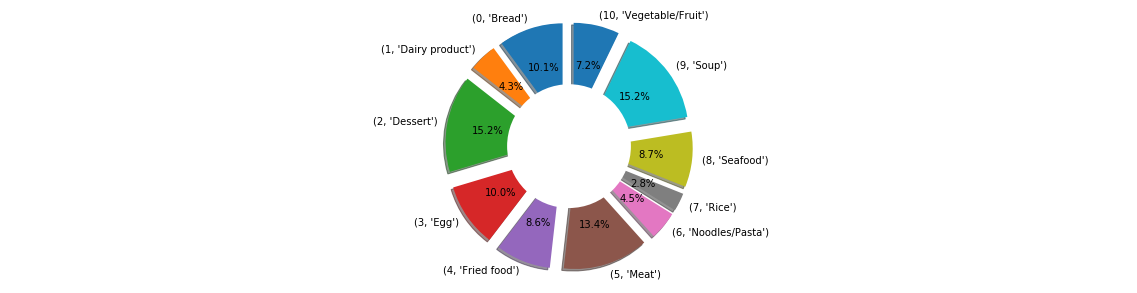

In [19]:
fig1, ax1 = plt.subplots(figsize=(20, 5))
explode = np.full([len(train_counts),], 0.2)

#print(label_arr)
ax1.pie(train_counts, explode=explode, labels=label_dict.items(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


#draw circle
centre_circle = plt.Circle((0,0),0.60,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()
fig.savefig(os.path.join(image_dir, 'Data_Ratio_Per_Label.jpg'), bbox_inches='tight', pad_inches=0)

### Visualize Data Image Dimentions

In [20]:
'''
Helper function to get shape of the image and return set of unique image shape
'''
def get_dataset_unique_shape(path_in):
    unique_dimentions = set()
    coll = io.ImageCollection(path_in)

    for index in range(len(coll)):
        #unique_dimentions.add(io.ImageCollection(train_mat[index][0])[0].shape)
        unique_dimentions.add(coll[index].shape)
    return unique_dimentions

In [21]:
'''
Helper function to print stats given unique image shape
'''
def analyze_data_shape(unique_dimentions_in):
    min_first = min_second = min_third = float("inf")
    max_first = max_second = max_third = -1*float("inf")
    for x in unique_dimentions_in:
        a, y, z = x
        min_first = min(a, min_first)
        min_second = min(y, min_second)
        min_third = min(z, min_third)
        max_first = max(a, max_first)
        max_second = max(y, max_second)
        max_third = max(z, max_third)
    print("Number of unique image shape is: ", len(unique_dimentions_in))
    
    print("Minimum image shape is: ", (min(unique_dimentions_in)))
    print("Maximum image shape is: ", (max(unique_dimentions_in)))
    
    print("Minimum image shape per dimention is: ", (min_first, min_second, min_third))
    print("Maximum image shape per dimention is: ", (max_first, max_second, max_third))

In [22]:
'''
Pretty Print Labels
'''
from IPython.display import Markdown, display
def printmd(string, color="blue"):
    colorstr = "<span style='color:{}'>{}</span>".format(color, "**"+string.title()+"**")
    display(Markdown(colorstr))

### See the different image dimentions before deciding matrix size

In [23]:
for i in range(len(all_directories)):
    printmd(os.path.basename(all_directories[i]))
    analyze_data_shape(get_dataset_unique_shape(all_images[i]))

<span style='color:blue'>**Training**</span>

Number of unique image shape is:  542
Minimum image shape is:  (207, 270, 3)
Maximum image shape is:  (4912, 7360, 3)
Minimum image shape per dimention is:  (207, 220, 3)
Maximum image shape per dimention is:  (4912, 7360, 3)


<span style='color:blue'>**Validation**</span>

Number of unique image shape is:  251
Minimum image shape is:  (227, 351, 3)
Maximum image shape is:  (6144, 9216, 3)
Minimum image shape per dimention is:  (227, 287, 3)
Maximum image shape per dimention is:  (6144, 9216, 3)


<span style='color:blue'>**Evaluation**</span>

Number of unique image shape is:  244
Minimum image shape is:  (257, 343, 3)
Maximum image shape is:  (5126, 9542, 3)
Minimum image shape per dimention is:  (257, 288, 3)
Maximum image shape per dimention is:  (5126, 9542, 3)
